## Kosaraju's Two-Pass Algorithm :  DFS - Strongly Connected Component



In [ ]:
import urllib3
import numpy as np
import networkx as nx

ft = 1
order = 1

def dfs_scc(G, startvert, start):
    global ft
    global order
    G.nodes[startvert]['explored'] = 1
    G.nodes[startvert]['scc'] = start
    G.nodes[startvert]['starting time'] = order
    w = list(G.adj[startvert])
    for adjnode in w:
        if G.nodes[adjnode]['explored'] == 0:
            order = order+1
            dfs_scc(G, adjnode, start)
            G.nodes[adjnode]['finishing time'] = ft
            ft += 1
    
def kosarajuSCC(DG):
    # 1st Pass
    reverseDG = DG.reverse() # default copy=True
    for node in list(reverseDG.nodes):
        reverseDG.nodes[node]['explored'] = 0
        reverseDG.nodes[node]['scc'] =  float('inf')
        reverseDG.nodes[node]['starting time'] =  float('inf')
        reverseDG.nodes[node]['finishing time'] =  node
    global ft
    global order
    ft = 0
    order = 0
    reversed_graph = reverseDG.nodes.data()
    nodes_reverse = []
    for n, ndict in reversed_graph:
        nodes_reverse.append(ndict['finishing time'])
    nodes_reverse.reverse()
    for node_ft in nodes_reverse:
        for n, ndict in reversed_graph:
            if ndict['finishing time'] == node_ft:
                if reverseDG.nodes[n]['explored'] == 0:
                    order = order+1
                    ft += 1
                    dfs_scc(reverseDG, n, n)
                    reverseDG.nodes[n]['finishing time'] = ft
    # 2nd Pass
    DG = reverseDG.reverse()
    ft = 0
    order = 0
    for node in list(DG.nodes):
        DG.nodes[node]['explored'] = 0
    orig_graph = DG.nodes.data()
    for node_ft in nodes_reverse:
        for n, ndict in orig_graph:
            if ndict['finishing time'] == node_ft:
                if DG.nodes[n]['explored'] == 0:
                    order = order+1
                    ft += 1
                    dfs_scc(DG, n, n)
                    DG.nodes[n]['finishing time'] = ft
    
    scc = {}
    print("Node \t Strongly Connected Component \t starting time \t finishing time \t explored")
    for n, ndict in DG.nodes.data():
        print("{} \t\t {} \t\t\t {} \t\t {} \t\t\t {}".format(n, ndict['scc'], ndict['starting time'], ndict['finishing time'], ndict['explored']))  
        if ndict['scc'] not in scc:
            scc[ndict['scc']] = 1 
        else:
            scc[ndict['scc']] += 1 
    print(scc)

DG = nx.DiGraph()
reverseDG = nx.DiGraph()

# Test case
http = urllib3.PoolManager()
r1 = http.request('GET', "https://d3c33hcgiwev3.cloudfront.net/_410e934e6553ac56409b2cb7096a44aa_SCC.txt?Expires=1561507200&Signature=b-X~V6kXqfyz3PUZ6frDKWfBOdTiNqzgLRrzd3UwTZ9XGBPhztKN0ZALk7pK-01DcpKHnyLPUZK0YHduav3xof2xNchlXUz5vJ67WgvEjevxo0Kf8F1jwKVUjEFqVnsTxxedXejOHcXYtoU-MVFJtYxiWp2veOruppHBmzYidAc_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A")
IntegerMatrixStringJoin = r1.data.split('\r\n')
IntegerMatrixString = IntegerMatrixStringJoin[0].split(' \n')
for i in IntegerMatrixString:
    from_to = i.split(' ')
    fromint = int(from_to[0])
    toint = int(from_to[1])
    print("from: {} \t to: {}".format(fromint, toint))
    DG.add_edge(fromint, toint)
    
kosarajuSCC(DG)    
      

## Optimized  Kosaraju's Two-Pass Algorithm :  DFS - Strongly Connected Component



Node 	 Strongly Connected Component 	 starting time 	 finishing time 	 explored
1 		 6 			 5 		 5 			 1
2 		 4 			 8 		 8 			 1
3 		 4 			 9 		 7 			 1
4 		 4 			 7 		 9 			 1
5 		 6 			 6 		 4 			 1
6 		 6 			 4 		 6 			 1
7 		 9 			 2 		 2 			 1
8 		 9 			 3 		 1 			 1
9 		 9 			 1 		 3 			 1


Size of SCCs: {9: 3, 4: 3, 6: 3}


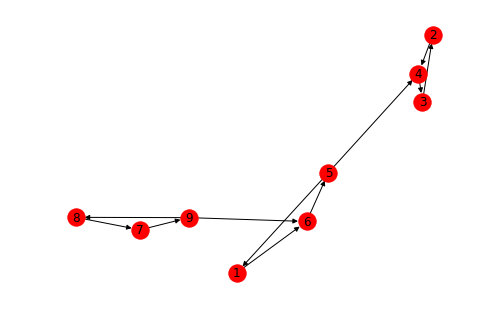

In [23]:
import urllib3
import numpy as np
import networkx as nx

ft = 1
order = 1

def dfs_scc(G, startvert, start):
    global ft
    global order
    G.nodes[startvert]['explored'] = 1
    G.nodes[startvert]['scc'] = start
    G.nodes[startvert]['starting time'] = order
    w = list(G.adj[startvert])
    for adjnode in w:
        if G.nodes[adjnode]['explored'] == 0:
            order = order+1
            dfs_scc(G, adjnode, start)
            G.nodes[adjnode]['finishing time'] = ft
            ft += 1
    
def kosarajuSCC(reverseDG):
    # 1st Pass
    for node in list(reverseDG.nodes):
        reverseDG.nodes[node]['explored'] = 0
        reverseDG.nodes[node]['scc'] =  float('inf')
        reverseDG.nodes[node]['starting time'] =  float('inf')
        reverseDG.nodes[node]['finishing time'] =  node
    global ft
    global order
    ft = 0
    order = 0
    reversed_graph = reverseDG.nodes.data()
    nodes_reverse = []
    for n, ndict in reversed_graph:
        nodes_reverse.append(ndict['finishing time'])
    nodes_reverse.reverse()
    for node_ft in nodes_reverse:
        for n, ndict in reversed_graph:
            if ndict['finishing time'] == node_ft:
                if reverseDG.nodes[n]['explored'] == 0:
                    order = order+1
                    ft += 1
                    dfs_scc(reverseDG, n, n)
                    reverseDG.nodes[n]['finishing time'] = ft
    # 2nd Pass
    DG = reverseDG.reverse()
    ft = 0
    order = 0
    for node in list(DG.nodes):
        DG.nodes[node]['explored'] = 0
    orig_graph = DG.nodes.data()
    for node_ft in nodes_reverse:
        for n, ndict in orig_graph:
            if ndict['finishing time'] == node_ft:
                if DG.nodes[n]['explored'] == 0:
                    order = order+1
                    ft += 1
                    dfs_scc(DG, n, n)
                    DG.nodes[n]['finishing time'] = ft
    
    scc = {}
    print("Node \t Strongly Connected Component \t starting time \t finishing time \t explored")
    for n, ndict in DG.nodes.data():
        print("{} \t\t {} \t\t\t {} \t\t {} \t\t\t {}".format(n, ndict['scc'], ndict['starting time'], ndict['finishing time'], ndict['explored']))  
        if ndict['scc'] not in scc:
            scc[ndict['scc']] = 1 
        else:
            scc[ndict['scc']] += 1 
    print("\n\nSize of SCCs: {}".format(scc))
    

def kosarajuCreateGraph(to_int, from_int): # create Kosaraju reverse graph
    global reverseDG
    reverseDG.add_edge(from_int, to_int) 

'''DG = nx.DiGraph()
reverseDG = nx.DiGraph()

# Test case
http = urllib3.PoolManager()
r1 = http.request('GET', "https://d3c33hcgiwev3.cloudfront.net/_410e934e6553ac56409b2cb7096a44aa_SCC.txt?Expires=1561507200&Signature=b-X~V6kXqfyz3PUZ6frDKWfBOdTiNqzgLRrzd3UwTZ9XGBPhztKN0ZALk7pK-01DcpKHnyLPUZK0YHduav3xof2xNchlXUz5vJ67WgvEjevxo0Kf8F1jwKVUjEFqVnsTxxedXejOHcXYtoU-MVFJtYxiWp2veOruppHBmzYidAc_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A")
IntegerMatrixStringJoin = r1.data.split('\r\n')
IntegerMatrixString = IntegerMatrixStringJoin[0].split(' \n')
for i in IntegerMatrixString:
    from_to = i.split(' ')
    fromint = int(from_to[0])
    toint = int(from_to[1])
    print("from: {} \t to: {}".format(fromint, toint))
    DG.add_edge(fromint, toint)
'''

#DG = nx.DiGraph()
reverseDG = nx.DiGraph()
edges = ['9 7 ', '7 8 ', '8 9 ', '6 9 ', '5 6 ', '6 1 ', '1 5 ', '4 5 ', '3 4 ', '4 2 ', '2 3 ']
for i in edges:
    from_to = i.split(' ')
    fromint = int(from_to[0])
    toint = int(from_to[1])
    #print("from: {} \t to: {}".format(fromint, toint))
    kosarajuCreateGraph(fromint, toint) 

nx.draw(reverseDG, with_labels = True)
    
kosarajuSCC(reverseDG)    
      

## Read-Write from memory  (Not Working)

In [22]:
import urllib3
import numpy as np
import networkx as nx
import pandas as pd
import os


ft = 1
order = 1

def dfs_scc(G, startvert, start):
    global ft
    global order
    G.nodes[startvert]['explored'] = 1
    G.nodes[startvert]['scc'] = start
    G.nodes[startvert]['starting time'] = order
    w = list(G.adj[startvert])
    for adjnode in w:
        if G.nodes[adjnode]['explored'] == 0:
            order = order+1
            dfs_scc(G, adjnode, start)
            G.nodes[adjnode]['finishing time'] = ft
            ft += 1
    
def kosarajuSCC(edge_file_name, nodes_file_name):
    # 1st Pass
    global ft
    global order
    ft = 0
    order = 0
    i=0
    nodes_reverse = []
    for chunk in pd.read_csv("nodes.csv", chunksize=2):
    #for chunk in pd.read_csv("nodes.csv", chunksize=994):
        list_chunk = chunk["finishing time"].values.tolist()
        list_chunk.reverse()
        nodes_reverse = list_chunk + nodes_reverse
        #i = i + 994
        i = i+2
    for node_ft in nodes_reverse:
        with open('nodes.csv', 'a') as nodes_file: 
            
        for n, ndict in reversed_graph:
            if ndict['finishing time'] == node_ft:
                if reverseDG.nodes[n]['explored'] == 0:
                    order = order+1
                    ft += 1
                    dfs_scc(reverseDG, n, n)
                    reverseDG.nodes[n]['finishing time'] = ft
    # 2nd Pass
    DG = reverseDG.reverse()
    ft = 0
    order = 0
    for node in list(DG.nodes):
        DG.nodes[node]['explored'] = 0
    orig_graph = DG.nodes.data()
    for node_ft in nodes_reverse:
        for n, ndict in orig_graph:
            if ndict['finishing time'] == node_ft:
                if DG.nodes[n]['explored'] == 0:
                    order = order+1
                    ft += 1
                    dfs_scc(DG, n, n)
                    DG.nodes[n]['finishing time'] = ft
    
    scc = {}
    print("Node \t Strongly Connected Component \t starting time \t finishing time \t explored")
    for n, ndict in DG.nodes.data():
        print("{} \t\t {} \t\t\t {} \t\t {} \t\t\t {}".format(n, ndict['scc'], ndict['starting time'], ndict['finishing time'], ndict['explored']))  
        if ndict['scc'] not in scc:
            scc[ndict['scc']] = 1 
        else:
            scc[ndict['scc']] += 1 
    print("\n\nSize of SCCs: {}".format(scc))
    

def kosarajuCreateGraph(from_int, to_int): # create Kosaraju reverse graph
    global header_setter1
    d = {'from': [fromint], 'to': [toint]}
    df = pd.DataFrame(data=d)
    with open('edge.csv', 'a') as edge_file:
        if header_setter1 == 0:
            df.to_csv(edge_file, header=True, index=False)
            header_setter1 = 1
        elif header_setter1 == 1:
            df.to_csv(edge_file, header=False, index=False)
    with open('nodes.csv', 'a') as nodes_file: 
        if os.path.getsize("nodes.csv") <= 0:
            d2 = {'node': [fromint], 'explored': [0], 'scc': [float('inf')], 'starting time': [float('inf')], 'finishing time': [fromint]}
            df2 = pd.DataFrame(data=d2)
            df2.to_csv(nodes_file, header=True, index=False)
    with open('nodes.csv', 'a') as nodes_file: 
        nodes_stored = pd.read_csv("nodes.csv")  
        if nodes_stored.loc[nodes_stored['node'] == fromint].empty:
            d2 = {'node': [fromint], 'explored': [0], 'scc': [float('inf')], 'starting time': [float('inf')], 'finishing time': [fromint]}
            df2 = pd.DataFrame(data=d2)
            df2.to_csv(nodes_file, header=False, index=False)          

    
'''DG = nx.DiGraph()
reverseDG = nx.DiGraph()

# Test case
http = urllib3.PoolManager()
r1 = http.request('GET', "https://d3c33hcgiwev3.cloudfront.net/_410e934e6553ac56409b2cb7096a44aa_SCC.txt?Expires=1561507200&Signature=b-X~V6kXqfyz3PUZ6frDKWfBOdTiNqzgLRrzd3UwTZ9XGBPhztKN0ZALk7pK-01DcpKHnyLPUZK0YHduav3xof2xNchlXUz5vJ67WgvEjevxo0Kf8F1jwKVUjEFqVnsTxxedXejOHcXYtoU-MVFJtYxiWp2veOruppHBmzYidAc_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A")
IntegerMatrixStringJoin = r1.data.split('\r\n')
IntegerMatrixString = IntegerMatrixStringJoin[0].split(' \n')
for i in IntegerMatrixString:
    from_to = i.split(' ')
    fromint = int(from_to[0])
    toint = int(from_to[1])
    print("from: {} \t to: {}".format(fromint, toint))
    DG.add_edge(fromint, toint)
'''

edges = ['9 7 ', '7 8 ', '8 9 ', '6 9 ', '5 6 ', '6 1 ', '1 5 ', '4 5 ', '3 4 ', '4 2 ', '2 3 ']
header_setter1 = 0
if os.path.exists('nodes.csv'):
    os.remove('nodes.csv')
if os.path.exists('edge.csv'):
    os.remove('edge.csv')
#with open('edge.csv', 'a') as edge_file, open('nodes.csv', 'a') as nodes_file:
for i in edges:
    from_to = i.split(' ')
    fromint = int(from_to[0])
    toint = int(from_to[1])
    kosarajuCreateGraph(fromint, toint) 
        

edge_stored = pd.read_csv("edge.csv")
print(edge_stored)
nodes_stored = pd.read_csv("nodes.csv")
print(nodes_stored)

kosarajuSCC("edge.csv", "nodes.csv")    
      

    from  to
0      9   7
1      7   8
2      8   9
3      6   9
4      5   6
5      6   1
6      1   5
7      4   5
8      3   4
9      4   2
10     2   3
   explored  finishing time  node  scc  starting time
0         0               9     9  inf            inf
1         0               7     7  inf            inf
2         0               8     8  inf            inf
3         0               6     6  inf            inf
4         0               5     5  inf            inf
5         0               1     1  inf            inf
6         0               4     4  inf            inf
7         0               3     3  inf            inf
8         0               2     2  inf            inf
   explored  finishing time  node  scc  starting time
0         0               9     9  inf            inf
1         0               7     7  inf            inf
0    9
1    7
Name: finishing time, dtype: int64
9
   explored  finishing time  node  scc  starting time
2         0               8     8  in

NameError: global name 'reversed_graph' is not defined